<a href="https://colab.research.google.com/github/martynawl/data-science-bootcamp/blob/main/03_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas

In [ ]:
import pandas as pd
pd.__version__

'1.3.5'

Podstawowe struktury danych: pd.Series

In [ ]:
s = pd.Series(data=[3, 2, 4, 6])
s

0    3
1    2
2    4
3    6
dtype: int64

In [ ]:
s = pd.Series(data=[3, 2, 4, 6], index=['a', 'b', 'c', 'd'], name='sample')
s

a    3
b    2
c    4
d    6
Name: sample, dtype: int64

In [ ]:
import numpy as np

s = pd.Series(data=[3., np.nan, 4, 6], index=['a', 'b', 'c', 'c'], name='sample')
s

a    3.0
b    NaN
c    4.0
c    6.0
Name: sample, dtype: float64

In [ ]:
s = pd.Series(data=[True, False, False])
s

0     True
1    False
2    False
dtype: bool

In [ ]:
s = pd.Series(data=np.arange(10, 20), index=pd.date_range(start='20200101', periods=10))
s

2020-01-01    10
2020-01-02    11
2020-01-03    12
2020-01-04    13
2020-01-05    14
2020-01-06    15
2020-01-07    16
2020-01-08    17
2020-01-09    18
2020-01-10    19
Freq: D, dtype: int64

In [ ]:
list(s.index)

[Timestamp('2020-01-01 00:00:00', freq='D'),
 Timestamp('2020-01-02 00:00:00', freq='D'),
 Timestamp('2020-01-03 00:00:00', freq='D'),
 Timestamp('2020-01-04 00:00:00', freq='D'),
 Timestamp('2020-01-05 00:00:00', freq='D'),
 Timestamp('2020-01-06 00:00:00', freq='D'),
 Timestamp('2020-01-07 00:00:00', freq='D'),
 Timestamp('2020-01-08 00:00:00', freq='D'),
 Timestamp('2020-01-09 00:00:00', freq='D'),
 Timestamp('2020-01-10 00:00:00', freq='D')]

In [ ]:
s.dtypes

dtype('int64')

Tworzenie obiektów cz.2

In [ ]:
s = pd.Series(data=['python', 'java', 'sql'], name='languages')
s

0    python
1      java
2       sql
Name: languages, dtype: object

In [ ]:
type(s)

pandas.core.series.Series

In [ ]:
s.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
s.values

array(['python', 'java', 'sql'], dtype=object)

In [ ]:
s.dtypes

dtype('O')

In [ ]:
s.shape

(10,)

Praca z obiektem

In [ ]:
price = pd.Series(data={'Apple': 200, 'CD Project': 60, 'Amazon': 1000, 'KGHM': np.nan})
price

Apple          200.0
CD Project      60.0
Amazon        1000.0
KGHM             NaN
dtype: float64

In [ ]:
price['CD Project']

60

In [ ]:
price[1]

60

In [ ]:
price.count()

3

In [ ]:
price.value_counts(dropna=False)

200.0     1
60.0      1
1000.0    1
NaN       1
dtype: int64

In [ ]:
price.sum()

1260

In [ ]:
price.min()

60

In [ ]:
price.max()

1000

In [ ]:
price.std()

507.14889332423866

In [ ]:
price.describe()

count       3.000000
mean      420.000000
std       507.148893
min        60.000000
25%       130.000000
50%       200.000000
75%       600.000000
max      1000.000000
dtype: float64

In [ ]:
price.nlargest(2)

Amazon    1000.0
Apple      200.0
dtype: float64

In [ ]:
price.nsmallest(1)

CD Project    60.0
dtype: float64

In [ ]:
price.rank()

Apple         2.0
CD Project    1.0
Amazon        3.0
KGHM          NaN
dtype: float64

In [ ]:
price.sort_values()

CD Project      60.0
Apple          200.0
Amazon        1000.0
KGHM             NaN
dtype: float64

In [ ]:
price.sort_values(ascending=False)

Amazon        1000.0
Apple          200.0
CD Project      60.0
KGHM             NaN
dtype: float64

Metoda apply()

In [ ]:
price_pln = price.apply(lambda x: x * 3.8)

In [ ]:
price

Apple          200.0
CD Project      60.0
Amazon        1000.0
KGHM             NaN
dtype: float64

DataFrame: tworzenie obiektów

In [ ]:
df = pd.DataFrame(data=[12, 12, 32])
df

,0
0,12
1,12
2,32


In [ ]:
df = pd.DataFrame(data=[12, 12, 32], index=['first', 'second', 'third'], columns=['col_1'])
df

,col_1
first,12
second,12
third,32


In [ ]:
df = pd.DataFrame(data={'WIG20': ['PKN ORLEN', 'PKO BP'],
                        'mWIG40': ['Amica', 'Playway']})
df

,WIG20,mWIG40
0,PKN ORLEN,Amica
1,PKO BP,Playway


In [ ]:
df = pd.DataFrame(data=[[10, 12, 13], [23, 12, 10]], index=['first', 'second'], columns=['col_1', 'col_2', 'col_3'])
df

,col_1,col_2,col_3
first,10,12,13
second,23,12,10


In [ ]:
df.columns

Index(['col_1', 'col_2', 'col_3'], dtype='object')

In [ ]:
df.index

Index(['first', 'second'], dtype='object')

In [ ]:
df.values

array([[10, 12, 13],
       [23, 12, 10]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, first to second
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col_1   2 non-null      int64
 1   col_2   2 non-null      int64
 2   col_3   2 non-null      int64
dtypes: int64(3)
memory usage: 172.0+ bytes


In [ ]:
df.describe()

,col_1,col_2,col_3
count,2.000000,2.0,2.00000
mean,16.500000,12.0,11.50000
std,9.192388,0.0,2.12132
min,10.000000,12.0,10.00000
25%,13.250000,12.0,10.75000
50%,16.500000,12.0,11.50000
75%,19.750000,12.0,12.25000
max,23.000000,12.0,13.00000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,2.0,16.5,9.192388,10.0,13.25,16.5,19.75,23.0
col_2,2.0,12.0,0.000000,12.0,12.00,12.0,12.00,12.0
col_3,2.0,11.5,2.121320,10.0,10.75,11.5,12.25,13.0


DataFrame: selekcja kolumn

In [ ]:
df

,col_1,col_2,col_3
first,10,12,13
second,23,12,10


In [ ]:
df['col_1']

first     10
second    23
Name: col_1, dtype: int64

In [ ]:
type(df['col_1'])

pandas.core.series.Series

In [ ]:
df[['col_1']]

,col_1
first,10
second,23


In [ ]:
type(df[['col_1']])

pandas.core.frame.DataFrame

In [ ]:
df.columns = ['a', 'sprzedaz_grudzien', 'c']
df

,a,sprzedaz_grudzien,c
first,10,12,13
second,23,12,10


In [ ]:
df.a

first     10
second    23
Name: a, dtype: int64

In [ ]:
df.sprzedaz_grudzien

first     12
second    12
Name: sprzedaz_grudzien, dtype: int64

In [ ]:
df['d'] = df.a + df.c
df

,a,sprzedaz_grudzien,c,d
first,10,12,13,23
second,23,12,10,33


In [ ]:
df = pd.DataFrame(data=[[10, 12, 13], [23, 12, 10]], index=['first', 'second'], columns=['col_1', 'col_2', 'col_3'])
df

,col_1,col_2,col_3
first,10,12,13
second,23,12,10


In [ ]:
df.loc['first']

col_1    10
col_2    12
col_3    13
Name: first, dtype: int64

In [ ]:
df.loc['first', 'col_2']

12

In [ ]:
df.loc[:, 'col_2']

first     12
second    12
Name: col_2, dtype: int64

In [ ]:
df.iloc[0]

col_1    10
col_2    12
col_3    13
Name: first, dtype: int64

In [ ]:
df.iloc[0, 1]

12

Dane giełdowe cz.1

In [ ]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.21.6
Pandas: 1.3.5


In [ ]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2022-06-30 to 2017-07-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,108.1100,108.1800,102.5200,106.2100,97679401
2022-06-29,107.3800,110.9900,106.9100,108.9200,66375341
2022-06-28,113.5000,114.8500,107.0400,107.4000,75172028
2022-06-27,117.0900,117.9800,112.7000,113.2200,62133240
2022-06-24,112.3800,116.7100,111.4300,116.4600,69867618
...,...,...,...,...,...
2017-07-10,49.2500,49.9720,49.1750,49.8235,70775340
2017-07-07,48.4775,49.0055,48.4570,48.9380,52101760
2017-07-06,48.2330,48.7200,47.9510,48.2570,65148760


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,108.11,108.18,102.52,106.21,97679401
2022-06-29,107.38,110.99,106.91,108.92,66375341
2022-06-28,113.50,114.85,107.04,107.40,75172028
2022-06-27,117.09,117.98,112.70,113.22,62133240
2022-06-24,112.38,116.71,111.43,116.46,69867618


In [ ]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,108.11,108.1800,102.52,106.21,97679401
2022-06-29,107.38,110.9900,106.91,108.92,66375341
2022-06-28,113.50,114.8500,107.04,107.40,75172028
2022-06-27,117.09,117.9800,112.70,113.22,62133240
2022-06-24,112.38,116.7100,111.43,116.46,69867618
2022-06-23,110.39,113.0000,107.93,112.44,64345300
2022-06-22,107.43,112.1300,107.02,108.95,60040131
2022-06-21,108.20,111.6299,103.56,108.68,70901245
2022-06-17,102.80,106.9800,102.51,106.22,99772147


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,108.11,108.18,102.52,106.21,97679401
2022-06-29,107.38,110.99,106.91,108.92,66375341
2022-06-28,113.50,114.85,107.04,107.40,75172028


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-10,49.2500,49.9720,49.1750,49.8235,70775340
2017-07-07,48.4775,49.0055,48.4570,48.9380,52101760
2017-07-06,48.2330,48.7200,47.9510,48.2570,65148760
2017-07-05,48.0765,48.7500,47.7625,48.5700,72982060
2017-07-03,48.6395,48.7245,47.5500,47.6830,58182160


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2022-06-30,108.11,108.18,102.52,106.21,97679401
2022-06-29,107.38,110.99,106.91,108.92,66375341
2022-06-28,113.50,114.85,107.04,107.40,75172028
2022-06-27,117.09,117.98,112.70,113.22,62133240
2022-06-24,112.38,116.71,111.43,116.46,69867618


In [ ]:
df.describe()

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,113.817386,115.106473,112.367195,113.745885,8.657807e+07
std,40.760044,41.250217,40.201184,40.685859,4.119576e+07
min,47.000000,47.431500,46.587500,46.930000,1.762674e+07
25%,84.012500,85.002125,83.064000,83.844750,5.877207e+07
50%,96.712500,97.800000,95.525000,96.935750,7.497995e+07
75%,158.328500,159.931000,156.225000,158.093500,1.024317e+08
max,187.200000,188.654000,184.840000,186.570000,3.310520e+08


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.138174e+02,4.076004e+01,4.700000e+01,8.401250e+01,9.671250e+01,1.583285e+02,1.872000e+02
high,1258.0,1.151065e+02,4.125022e+01,4.743150e+01,8.500213e+01,9.780000e+01,1.599310e+02,1.886540e+02
low,1258.0,1.123672e+02,4.020118e+01,4.658750e+01,8.306400e+01,9.552500e+01,1.562250e+02,1.848400e+02
close,1258.0,1.137459e+02,4.068586e+01,4.693000e+01,8.384475e+01,9.693575e+01,1.580935e+02,1.865700e+02
volume,1258.0,8.657807e+07,4.119576e+07,1.762674e+07,5.877207e+07,7.497995e+07,1.024317e+08,3.310520e+08


Selekcja kolumn

In [ ]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2022-06-30,108.11,108.1800,102.52,106.21,97679401
2022-06-29,107.38,110.9900,106.91,108.92,66375341
2022-06-28,113.50,114.8500,107.04,107.40,75172028
2022-06-27,117.09,117.9800,112.70,113.22,62133240
2022-06-24,112.38,116.7100,111.43,116.46,69867618
2022-06-23,110.39,113.0000,107.93,112.44,64345300
2022-06-22,107.43,112.1300,107.02,108.95,60040131
2022-06-21,108.20,111.6299,103.56,108.68,70901245
2022-06-17,102.80,106.9800,102.51,106.22,99772147


In [ ]:
df['open']

Date
2022-06-30    108.11
2022-06-29    107.38
2022-06-28    113.50
2022-06-27    117.09
2022-06-24    112.38
2022-06-23    110.39
2022-06-22    107.43
2022-06-21    108.20
2022-06-17    102.80
2022-06-16    104.47
Name: open, dtype: float64

In [ ]:
df.open

Date
2022-06-30    108.11
2022-06-29    107.38
2022-06-28    113.50
2022-06-27    117.09
2022-06-24    112.38
2022-06-23    110.39
2022-06-22    107.43
2022-06-21    108.20
2022-06-17    102.80
2022-06-16    104.47
Name: open, dtype: float64

In [ ]:
df[['open', 'close']]

,open,close
Date,,
2022-06-30,108.11,106.21
2022-06-29,107.38,108.92
2022-06-28,113.50,107.40
2022-06-27,117.09,113.22
2022-06-24,112.38,116.46
2022-06-23,110.39,112.44
2022-06-22,107.43,108.95
2022-06-21,108.20,108.68
2022-06-17,102.80,106.22


In [ ]:
df.iloc[:, 0]

Date
2022-06-30    108.11
2022-06-29    107.38
2022-06-28    113.50
2022-06-27    117.09
2022-06-24    112.38
2022-06-23    110.39
2022-06-22    107.43
2022-06-21    108.20
2022-06-17    102.80
2022-06-16    104.47
Name: open, dtype: float64

In [ ]:
df.iloc[:, 3:5]

,close,volume
Date,,
2022-06-30,106.21,97679401
2022-06-29,108.92,66375341
2022-06-28,107.40,75172028
2022-06-27,113.22,62133240
2022-06-24,116.46,69867618
2022-06-23,112.44,64345300
2022-06-22,108.95,60040131
2022-06-21,108.68,70901245
2022-06-17,106.22,99772147


In [ ]:
df.iloc[:, [-1]]

,volume
Date,
2022-06-30,97679401
2022-06-29,66375341
2022-06-28,75172028
2022-06-27,62133240
2022-06-24,69867618
2022-06-23,64345300
2022-06-22,60040131
2022-06-21,70901245
2022-06-17,99772147


In [ ]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2022-06-30,102.52,106.21,97679401
2022-06-29,106.91,108.92,66375341
2022-06-28,107.04,107.40,75172028
2022-06-27,112.70,113.22,62133240
2022-06-24,111.43,116.46,69867618
2022-06-23,107.93,112.44,64345300
2022-06-22,107.02,108.95,60040131
2022-06-21,103.56,108.68,70901245
2022-06-17,102.51,106.22,99772147


In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2022-06-30,108.11,108.1800,102.52,106.21,97679401
2022-06-29,107.38,110.9900,106.91,108.92,66375341
2022-06-28,113.50,114.8500,107.04,107.40,75172028
2022-06-27,117.09,117.9800,112.70,113.22,62133240
2022-06-24,112.38,116.7100,111.43,116.46,69867618
2022-06-23,110.39,113.0000,107.93,112.44,64345300
2022-06-22,107.43,112.1300,107.02,108.95,60040131
2022-06-21,108.20,111.6299,103.56,108.68,70901245
2022-06-17,102.80,106.9800,102.51,106.22,99772147


In [ ]:
df.iloc[0]

open           108.11
high           108.18
low            102.52
close          106.21
volume    97679401.00
Name: 2022-06-30 00:00:00, dtype: float64

In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2022-06-30,108.11,108.18,102.52,106.21,97679401
2022-06-29,107.38,110.99,106.91,108.92,66375341
2022-06-28,113.50,114.85,107.04,107.40,75172028


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,108.1100,108.1800,102.5200,106.2100,97679401
2022-06-29,107.3800,110.9900,106.9100,108.9200,66375341
2022-06-28,113.5000,114.8500,107.0400,107.4000,75172028
2022-06-27,117.0900,117.9800,112.7000,113.2200,62133240
2022-06-24,112.3800,116.7100,111.4300,116.4600,69867618
...,...,...,...,...,...
2017-07-10,49.2500,49.9720,49.1750,49.8235,70775340
2017-07-07,48.4775,49.0055,48.4570,48.9380,52101760
2017-07-06,48.2330,48.7200,47.9510,48.2570,65148760


In [ ]:
df.loc['2017-07-03': '2017-07-10']

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-10,49.2500,49.9720,49.1750,49.8235,70775340
2017-07-07,48.4775,49.0055,48.4570,48.9380,52101760
2017-07-06,48.2330,48.7200,47.9510,48.2570,65148760
2017-07-05,48.0765,48.7500,47.7625,48.5700,72982060


Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data("UBER")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792 entries, 2022-06-30 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    792 non-null    float64
 1   High    792 non-null    float64
 2   Low     792 non-null    float64
 3   Close   792 non-null    float64
 4   Volume  792 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 37.1 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,21.11,21.1255,19.895,20.46,30882454
2022-06-29,22.11,22.1500,21.080,21.47,30704792
2022-06-28,22.97,23.4600,22.040,22.08,24360150
2022-06-27,23.45,23.6400,22.345,22.86,27153354
2022-06-24,22.48,23.1900,22.300,23.03,38140098


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,792.000000,792.000000,792.000000,792.000000,7.920000e+02
mean,39.083514,39.869144,38.187618,39.017652,2.555253e+07
std,9.610746,9.675584,9.490402,9.569969,1.698055e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,31.972500,32.797150,31.160000,32.030000,1.509386e+07
50%,37.185000,37.945000,36.377500,37.130000,2.165904e+07
75%,45.722500,46.660000,44.992500,45.730000,3.144676e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-30,21.11,21.1255,19.895,20.46,30882454
2022-06-29,22.11,22.1500,21.080,21.47,30704792
2022-06-28,22.97,23.4600,22.040,22.08,24360150


In [ ]:
df['Averange'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Averange
Date,,,,,,
2022-06-30,21.11,21.1255,19.895,20.46,30882454,20.785
2022-06-29,22.11,22.1500,21.080,21.47,30704792,21.790
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155
2022-06-24,22.48,23.1900,22.300,23.03,38140098,22.755


In [ ]:
df.sort_index()

,Open,High,Low,Close,Volume,Averange
Date,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240
...,...,...,...,...,...,...
2022-06-24,22.48,23.1900,22.300,23.03,38140098,22.755
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Averange
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [ ]:
df[['Close']].shift(3)

,Close
Date,
2019-05-10,NaN
2019-05-13,NaN
2019-05-14,NaN
2019-05-15,41.57
2019-05-16,37.10
...,...
2022-06-24,21.76
2022-06-27,21.50
2022-06-28,22.37


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Averange
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [ ]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Averange,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [ ]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [ ]:
del df['Daily Change']
df.head()

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
df.Daily_Change.min()

-0.21628767847699626

In [ ]:
df.Daily_Change.max()

0.3825910931174088

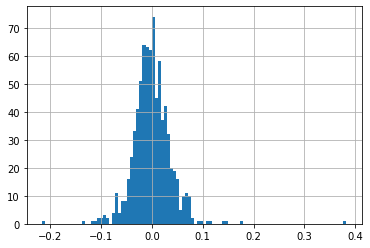

In [ ]:
df.Daily_Change.hist(bins=100)

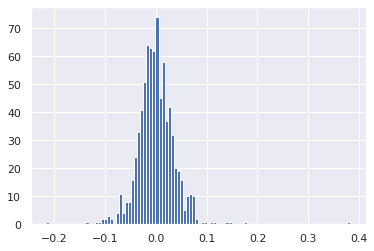

In [ ]:
import seaborn as sns
sns.set()
df.Daily_Change.hist(bins=100)

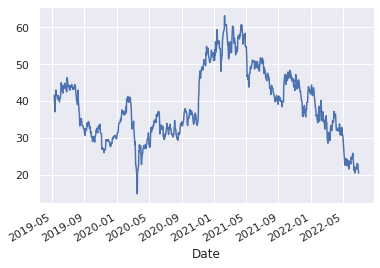

In [ ]:
df.Close.plot()

Filtrowanie danych

In [ ]:
df

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-06-24,22.48,23.1900,22.300,23.03,38140098,22.755,22.37,0.029504
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155,23.03,-0.007382
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525,22.86,-0.034121


In [ ]:
df.Daily_Change > 0

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15     True
2019-05-16     True
              ...  
2022-06-24     True
2022-06-27    False
2022-06-28    False
2022-06-29    False
2022-06-30    False
Name: Daily_Change, Length: 792, dtype: bool

In [ ]:
df[df.Daily_Change > 0]

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2022-06-08,25.70,26.55,25.30,25.83,31225314,25.765,25.30,0.020949
2022-06-15,21.34,22.39,21.24,22.03,36073711,21.685,21.09,0.044571
2022-06-17,20.37,21.96,20.37,21.81,46728428,21.090,20.47,0.065462


In [ ]:
df[df.Daily_Change < 0]

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2022-06-22,21.41,22.2100,21.300,21.50,32353317,21.455,21.76,-0.011949
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155,23.03,-0.007382
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525,22.86,-0.034121


In [ ]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2022-06-08,25.70,26.55,25.30,25.83,31225314,25.765,25.30,0.020949
2022-06-15,21.34,22.39,21.24,22.03,36073711,21.685,21.09,0.044571
2022-06-17,20.37,21.96,20.37,21.81,46728428,21.090,20.47,0.065462


In [ ]:
df_positive.Daily_Change.mean()

0.027727059180798434

In [ ]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2022-06-22,21.41,22.2100,21.300,21.50,32353317,21.455,21.76,-0.011949
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155,23.03,-0.007382
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525,22.86,-0.034121


In [ ]:
df_negative.Daily_Change.mean()

-0.02547926004421172

In [ ]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2022-06-24    False
2022-06-27    False
2022-06-28    False
2022-06-29    False
2022-06-30    False
Length: 792, dtype: bool

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780


In [ ]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112


In [ ]:
df

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-06-24,22.48,23.1900,22.300,23.03,38140098,22.755,22.37,0.029504
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155,23.03,-0.007382
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525,22.86,-0.034121


In [ ]:
df.index > '2019-11-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [ ]:
df[df.index > '2-19-11-01']

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.0000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-06-24,22.48,23.1900,22.300,23.03,38140098,22.755,22.37,0.029504
2022-06-27,23.45,23.6400,22.345,22.86,27153354,23.155,23.03,-0.007382
2022-06-28,22.97,23.4600,22.040,22.08,24360150,22.525,22.86,-0.034121


In [ ]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [ ]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Averange,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [2]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2022-07-08 to 2017-07-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-08,114.6000,116.5800,113.6900,115.5400,45719694
2022-07-07,113.8500,116.9900,113.4900,116.3300,57872323
2022-07-06,113.2100,115.4800,112.0100,114.3300,66958884
2022-07-05,107.6000,114.0800,106.3242,113.5000,76684414
2022-07-01,106.2900,109.7500,105.8469,109.5600,73021171
...,...,...,...,...,...
2017-07-17,50.2345,50.7375,50.1905,50.5020,74006660
2017-07-14,50.1200,50.2225,49.8445,50.0905,42020380
2017-07-13,50.2310,50.3440,49.7950,50.0315,57558080


In [6]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-31,116.2800,121.9940,115.6750,120.2100,144634160
2022-05-27,113.5500,115.1870,112.6280,115.1460,93660160
2022-05-26,107.9700,112.6650,107.4540,111.0780,93002600
2022-05-25,103.6560,108.1750,103.6500,106.7750,93120100
2022-05-24,104.0250,105.4000,101.2600,104.1000,102934680
...,...,...,...,...,...
2018-05-07,79.4670,80.3475,79.3915,80.0070,76037100
2018-05-04,78.1225,79.2450,78.1095,79.0475,68871340
2018-05-03,78.0005,78.7400,77.3010,78.6040,85038340


In [7]:
df[df.index.year == 2018]

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,75.5400,76.0380,74.3500,75.0985,139090140
2018-12-28,73.6675,75.6735,72.4500,73.9010,176579000
2018-12-27,72.7100,73.4500,69.5155,73.0820,194440680
2018-12-26,68.4445,73.6580,68.1505,73.5450,208236020
2018-12-24,67.3000,69.8015,65.3500,67.1980,144399920
...,...,...,...,...,...
2018-01-08,61.8000,62.6540,61.6015,62.3435,85409700
2018-01-05,60.8755,61.4570,60.5000,61.4570,70731320
2018-01-04,60.2500,60.7935,60.2330,60.4820,60348520


In [8]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-01,106.2900,109.7500,105.8469,109.5600,73021171
2022-06-01,122.2560,125.1790,120.6220,121.6840,127528980
2022-04-01,164.1500,165.8270,162.3200,163.5600,57089500
2022-03-01,152.7330,154.0990,149.9770,151.1420,44873580
2022-02-01,150.0000,151.7080,147.6280,151.1940,59219840
2021-12-01,177.2500,177.9940,172.0800,172.1860,75139900
2021-11-01,168.0900,168.7930,164.6010,165.9060,72177580
2021-10-01,164.4500,165.4590,162.7970,164.1630,56712340
2021-09-01,174.8200,176.3500,173.7620,173.9500,72598220


Zapis / odczyt danych CSV, XLSX

In [9]:
import numpy as np
import pandas as pd

In [17]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetch stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data('META')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-08,169.98,172.40,168.1501,170.88,19249243
2022-07-07,169.45,172.72,167.7800,172.19,24083368
2022-07-06,168.20,171.59,165.4600,169.77,23085921
2022-07-05,158.14,168.25,157.0200,168.19,28664799
2022-07-01,160.31,160.62,155.0000,160.03,31423933


In [18]:
df.to_csv('fb.csv')

In [21]:
df_nov = df[(df.index.month == 11) & (df.index.year == 2019)]
df_nov

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-29,201.600,203.800,201.210,201.64,7985231
2019-11-27,199.900,203.140,199.420,202.00,12729462
2019-11-26,200.000,200.150,198.039,198.97,11748664
2019-11-25,199.515,200.970,199.250,199.79,15286442
2019-11-22,198.380,199.300,197.620,198.82,9959817
2019-11-21,197.420,199.090,196.860,197.93,12130985
2019-11-20,198.580,199.590,195.430,197.51,12370240
2019-11-19,197.400,200.000,196.860,199.32,19070291
2019-11-18,194.560,198.630,193.050,197.40,16176107


In [24]:
df_nov.to_csv('fb_nov.csv')

In [25]:
new_df = pd.read_csv('fb_nov.csv')
new_df

,Date,Open,High,Low,Close,Volume
0,2019-11-29,201.600,203.800,201.210,201.64,7985231
1,2019-11-27,199.900,203.140,199.420,202.00,12729462
2,2019-11-26,200.000,200.150,198.039,198.97,11748664
3,2019-11-25,199.515,200.970,199.250,199.79,15286442
4,2019-11-22,198.380,199.300,197.620,198.82,9959817
5,2019-11-21,197.420,199.090,196.860,197.93,12130985
6,2019-11-20,198.580,199.590,195.430,197.51,12370240
7,2019-11-19,197.400,200.000,196.860,199.32,19070291
8,2019-11-18,194.560,198.630,193.050,197.40,16176107
9,2019-11-15,194.260,195.300,193.380,195.10,11530232


In [26]:
df_nov

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-29,201.600,203.800,201.210,201.64,7985231
2019-11-27,199.900,203.140,199.420,202.00,12729462
2019-11-26,200.000,200.150,198.039,198.97,11748664
2019-11-25,199.515,200.970,199.250,199.79,15286442
2019-11-22,198.380,199.300,197.620,198.82,9959817
2019-11-21,197.420,199.090,196.860,197.93,12130985
2019-11-20,198.580,199.590,195.430,197.51,12370240
2019-11-19,197.400,200.000,196.860,199.32,19070291
2019-11-18,194.560,198.630,193.050,197.40,16176107


In [27]:
df_nov.to_excel('fb_nov.xlsx')

In [30]:
new_df = pd.read_excel('fb_nov.xlsx', index_col=0)
new_df

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-29,201.600,203.800,201.210,201.64,7985231
2019-11-27,199.900,203.140,199.420,202.00,12729462
2019-11-26,200.000,200.150,198.039,198.97,11748664
2019-11-25,199.515,200.970,199.250,199.79,15286442
2019-11-22,198.380,199.300,197.620,198.82,9959817
2019-11-21,197.420,199.090,196.860,197.93,12130985
2019-11-20,198.580,199.590,195.430,197.51,12370240
2019-11-19,197.400,200.000,196.860,199.32,19070291
2019-11-18,194.560,198.630,193.050,197.40,16176107


London Bike Dateset



In [39]:
df = pd.read_csv('london_bike.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [40]:
df = df.set_index('timestamp')
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


Łączenie danych

In [41]:
import pandas as pd
pd.__version__

'1.3.5'

In [45]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetch stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

apple = fetch_financial_data('AAPL')
amazon = fetch_financial_data('AMZN')
google = fetch_financial_data('GOOGL')
uber = fetch_financial_data('UBER')
